## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

## Importing the dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\Advertising.csv')
dataset.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Checking for null values and data types

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### there are 200 rows and 5 columns in the dataset and there are no missing data

In [4]:
dataset['Unnamed: 0'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### Removing the unnecessary column. this column is just a indexing

In [5]:
dataset = dataset.drop(columns = 'Unnamed: 0')

### Looking at the data distribution, like mean, standard deviation, minimum and maximum values

In [6]:
dataset.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


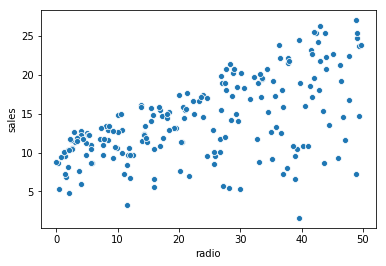

In [7]:
import seaborn as sns
sns.scatterplot(x = 'radio',y = 'sales',data = dataset)

#### Advertising throgh radio channel has a average positive co-relation with the sales

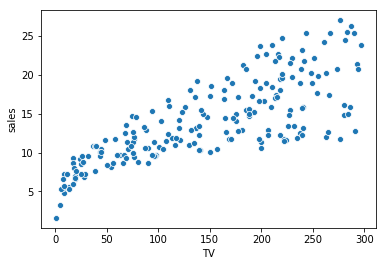

In [8]:
sns.scatterplot(x = 'TV', y = 'sales', data = dataset)

#### Advertising throgh TV channel has a good positive co-relation with the sales

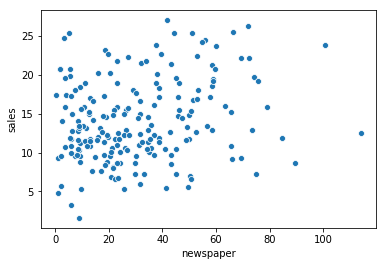

In [9]:
sns.scatterplot(x = 'newspaper', y = 'sales',data = dataset)

#### Advertising throgh newspaper channel has a very less/no co-relation with the sales

### Checking for outliers

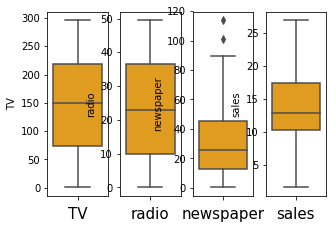

In [10]:
plt.figure(figsize = (5,40))
pltnum = 1
for i in dataset:
    if pltnum <=40:
        plt.subplot(10,4,pltnum)
        sns.boxplot(dataset[i],color = 'orange',orient = 'v')
        plt.xlabel(i, fontsize =15)
    pltnum+=1
plt.show()

#### only the newspaper column has a few outliers hence instead of removing it. I'm adjusting it using transformation

### Checking for correlation -coefficient, TV has highest and the news paper has lowest as visualized in the previous scatter plot

In [11]:
data_corr = dataset.corr()
data_corr['sales'].sort_values(ascending = False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

### There is no multi-collenearity issue with the data, you can view the same from the below figure

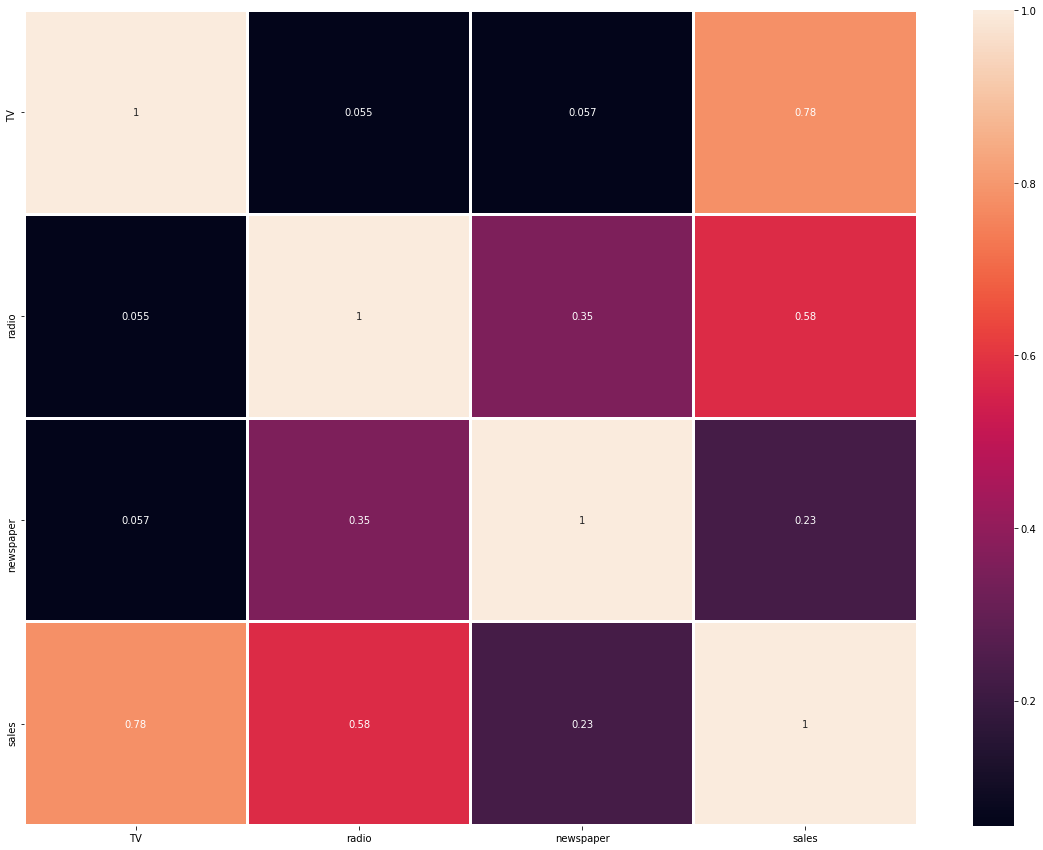

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(data_corr,linewidths=2,annot = True)
plt.show()

### Checking for data distribution and skewness

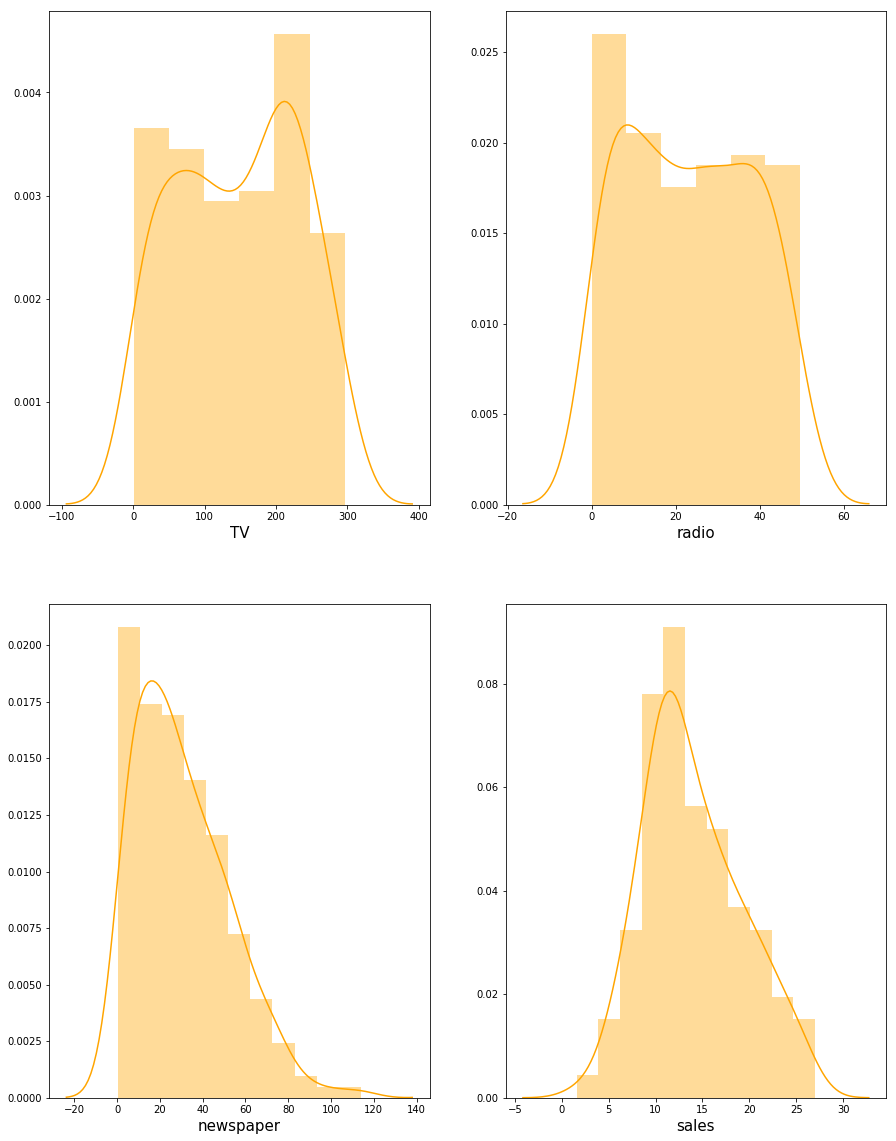

In [13]:
plt.figure(figsize = (15,20))
pltnum = 1
for i in dataset:
    if pltnum <=4:
        plt.subplot(2,2,pltnum)
        sns.distplot(dataset[i],color = 'orange')
        plt.xlabel(i, fontsize =15)
    pltnum+=1
plt.show()

## As we can see from the earlier box plot, the above figure and the below co-efficients, only the news paper has outliers/skewness.

In [14]:
dataset.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

### Splitting the dataset

In [15]:
x = dataset.drop(columns = 'sales')
y = dataset['sales']

### Applying the transformation

In [16]:
from sklearn.preprocessing import power_transform
tr = power_transform(x,method = 'yeo-johnson')
x = pd.DataFrame(tr, columns =x.columns)

### Post trandformation, I can see that the outliers has been removed

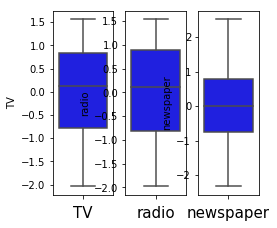

In [17]:
plt.figure(figsize = (5,40))
pltnum = 1
for i in x:
    if pltnum <=40:
        plt.subplot(10,4,pltnum)
        sns.boxplot(x[i],color = 'blue',orient = 'v')
        plt.xlabel(i, fontsize =15)
    pltnum+=1
plt.show()

### Finding the best random state for the regression problem

In [18]:
from sklearn.linear_model import LinearRegression
for i in range(1,3000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    r2_tr = lr.score(x_train,y_train)
    r2_ts = lr.score(x_test,y_test)
    if round(r2_tr*100,1) == round(r2_ts*100,1):
        rs=i
print('the best random state is',rs)

the best random state is 2953


### Splitting data with the best random state

### Model 1: Linear Regression

In [19]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.3,random_state =rs)
lr  = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_score = lr.score(x_test,y_test)
lr_score

0.9073587709007981

### The 'R2' score is 0.91 and the RMSE is 1.49

In [20]:
from sklearn.metrics import mean_squared_error
lr_rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
print('RMSE for Linear Regression: ', lr_rmse)

RMSE for Linear Regression:  1.486395850061951


### Model 2: Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_score = rfr.score(x_test,y_test)
rfr_score

0.9688383341694301

### The 'R2' score is 0.97 and the RMSE is 0.86

In [24]:
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))
print('RMSE for Random Forest Regression: ', rfr_rmse)

RMSE for Random Forest Regression:  0.8620702600909798


### Model 3: Extra Trees Regression

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = et.score(x_test,y_test)
et_score

0.9866551802095876

### The 'R2' score is 0.99 and the RMSE is 0.56

In [26]:
et_rmse = np.sqrt(mean_squared_error(y_test,et_pred))
print('RMSE for Extra Trees Regression: ', et_rmse)

RMSE for Extra Trees Regression:  0.5641423283770367


### Model 3: Support vector Regressor

In [28]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
svr_pred = svr.predict(x_test)
svr_score =  svr.score(x_test,y_test)
svr_score

0.9460351796409701

### The 'R2' score is 0.95 and the RMSE is 1.14

### Finding the cross validation scores

In [29]:
svr_rmse = np.sqrt(mean_squared_error(y_test,svr_pred))
print('RMSE for Support Vector Regression: ', svr_rmse)

RMSE for Support Vector Regression:  1.134456108183176


In [30]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lr,x,y,scoring ='r2',cv=7)
cv =cv.mean()
cv

0.8982025458270028

In [31]:
cv1 = cross_val_score(rfr,x,y,scoring ='r2',cv=7)
cv1 =cv1.mean()
cv1

0.9777166171044882

In [32]:
cv2 = cross_val_score(et,x,y,scoring ='r2',cv=7)
cv2 =cv2.mean()
cv2

0.9880648445623573

In [33]:
cv3 = cross_val_score(svr,x,y,scoring ='r2',cv=7)
cv3 =cv3.mean()
cv3

0.9192605281007766

In [34]:
mod = [lr_score,rfr_score,et_score,svr_score]
cv = [cv,cv1,cv2,cv3]
mod_sel = pd.DataFrame({})
mod_sel['mod'] = mod
mod_sel['cv'] = cv
mod_sel['diff'] = mod_sel['mod'] - mod_sel['cv']
mod_sel

,mod,cv,diff
0,0.907359,0.898203,0.009156
1,0.968838,0.977717,-0.008878
2,0.986655,0.988065,-0.001410
3,0.946035,0.919261,0.026775


### Upon comparing the scores, I found that the Extra trees regressor is the best model for the given dataset

## Hyper Parameter Tuning

In [40]:
params = {'n_estimators':[100,130,150,170],
         'max_depth':[5,6,7,8],
         'min_samples_split':[2,3,4,6],
         'max_leaf_nodes':[9,10,11,12],
         'n_jobs':[1,2,3,4]}

## Making use of grid search CV

In [41]:
gcv =GridSearchCV(ExtraTreesRegressor(),params, cv=5)
gcv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_leaf_nodes': [9, 10, 11, 12],
                         'min_samples_split': [2, 3, 4, 6],
                         'n_estimators': [100, 130, 150, 170],
                         'n_jobs': [1, 2, 3, 4]})

In [42]:
gcv.best_params_

{'max_depth': 6,
 'max_leaf_nodes': 12,
 'min_samples_split': 6,
 'n_estimators': 130,
 'n_jobs': 4}

In [43]:
fin_et = ExtraTreesRegressor(max_depth = 6, max_leaf_nodes = 12, min_samples_split = 6, n_estimators = 130, n_jobs = 4)
fin_et.fit(x_train,y_train)
fin_pred = fin_et.predict(x_test)
fin_score = fin_et.score(x_test,y_test)
fin_score

0.9733008965750967

In [44]:
fin = np.sqrt(mean_squared_error(y_test,fin_pred))
print('RMSE for Extra Trees Regression: ', fin)

RMSE for Extra Trees Regression:  0.797959167931115


### Visualizing the predicted/actual values

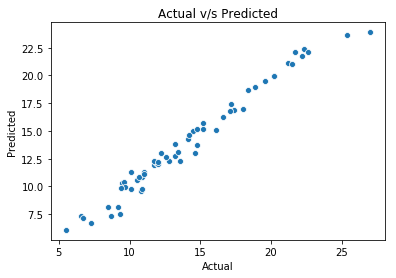

In [46]:
sns.scatterplot(y_test, fin_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')
plt.show()

### Saving the model

In [45]:
import joblib
joblib.dump(fin_et, 'Advertising.pkl')

['Advertising.pkl']